## 1. датасет з землеробними кластерами

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset_with_agriculture_clusters.csv")

In [19]:
print(df.head())
print(df.info())
print(df.describe())

       Country  Year  Annual CO₂ emissions  Agricultural_landshare_area_%  \
0  Afghanistan  1990             2024326.1                          58.32   
1  Afghanistan  1991             1914301.0                          58.31   
2  Afghanistan  1992             1482054.0                          58.31   
3  Afghanistan  1993             1486943.0                          58.16   
4  Afghanistan  1994             1453829.0                          57.97   

   Croplandshare_area_%  Permanent_meadows_and_pasturesshare_area_%  \
0                 12.33                                        46.0   
1                 12.31                                        46.0   
2                 12.31                                        46.0   
3                 12.16                                        46.0   
4                 11.98                                        46.0   

   Agriculture_area_actually_irrigatedshare_agriculture_%  \
0                                                

In [20]:
print("Пропущені значення:\n", df.isnull().sum())

Пропущені значення:
 Country                                                     0
Year                                                        0
Annual CO₂ emissions                                        0
Agricultural_landshare_area_%                              98
Croplandshare_area_%                                       97
Permanent_meadows_and_pasturesshare_area_%                 97
Agriculture_area_actually_irrigatedshare_agriculture_%    926
Arable_landshare_agriculture_%                             98
Croplandshare_agriculture_%                                98
Permanent_cropsshare_agriculture_%                         98
Permanent_meadows_and_pasturesshare_agriculture_%          98
Other_land_share                                           97
Temporary_crops_area_agriculture_share                     98
Nitrogen_Share_t                                          101
Phosphate_Share_t                                         101
Potash_Share_t                                   

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/3733710890.py:5: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


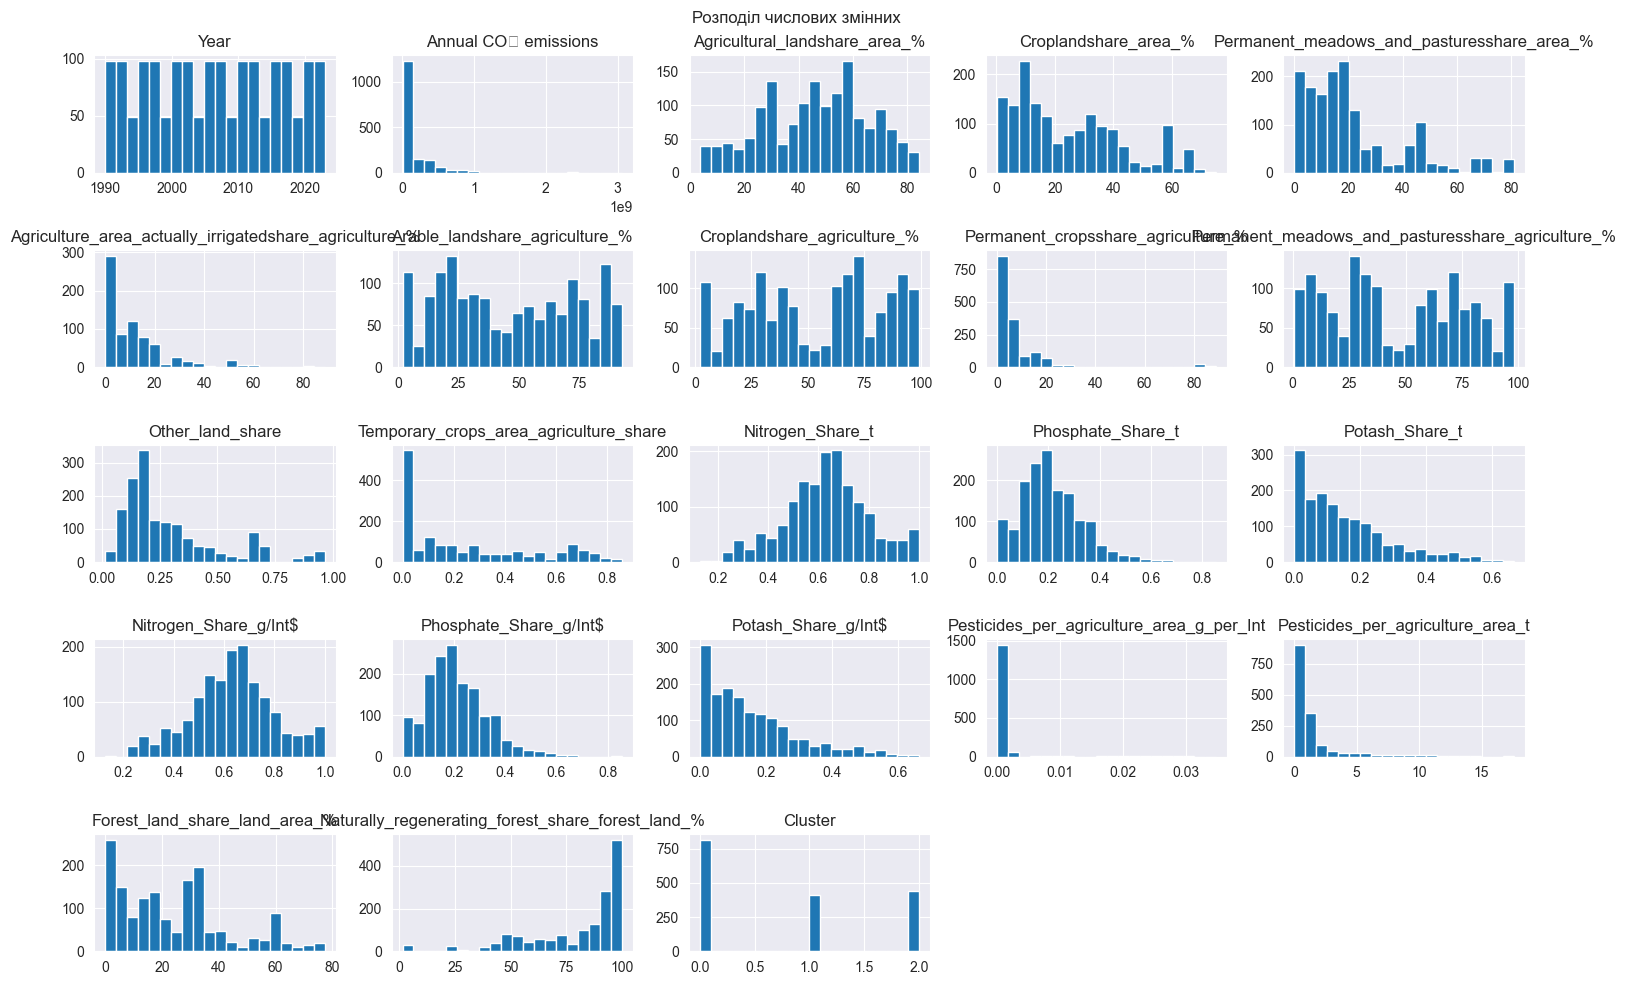

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Розподіл числових змінних')
plt.tight_layout()
plt.show()

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/671779623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


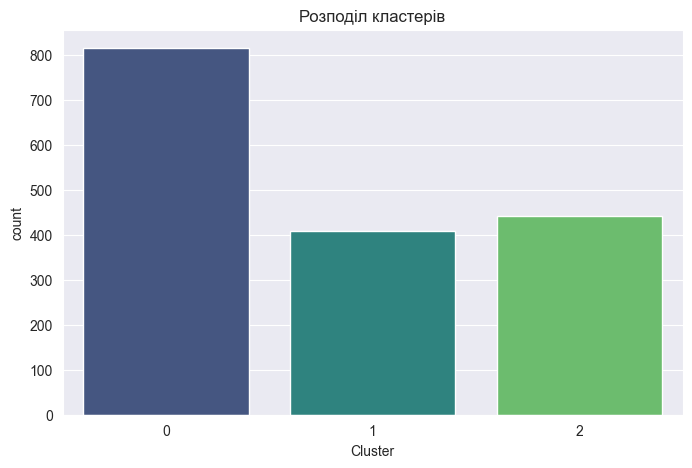

In [22]:
if 'Cluster' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Cluster', data=df, palette='viridis')
    plt.title('Розподіл кластерів')
    plt.show()

/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


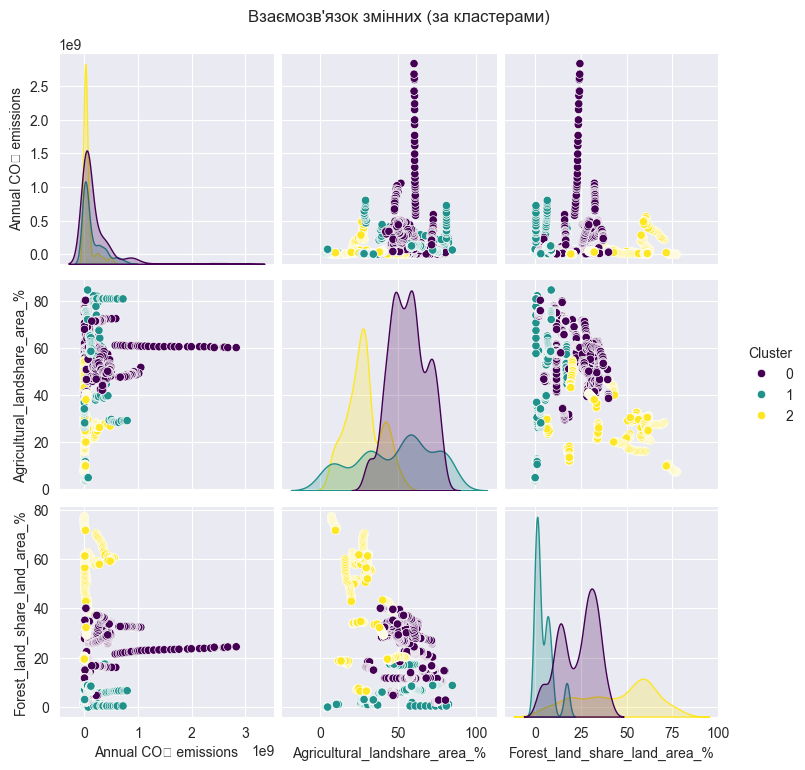

In [25]:
if 'Cluster' in df.columns:
    selected_features = ['Annual CO₂ emissions', 'Agricultural_landshare_area_%', 'Forest_land_share_land_area_%']
    sns.pairplot(df, vars=selected_features, hue='Cluster', palette='viridis')
    plt.suptitle("Взаємозв'язок змінних (за кластерами)", y=1.02)
    plt.show()

In [26]:
df.interpolate(method='linear', inplace=True)

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/195005142.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [4]:
grouped_df = df.groupby(['Cluster', 'Year']).agg(
    {
        'Annual CO₂ emissions': 'sum',
        'Agricultural_landshare_area_%': 'mean',
        'Croplandshare_area_%': 'mean',
        'Permanent_meadows_and_pasturesshare_area_%': 'mean',
        'Agriculture_area_actually_irrigatedshare_agriculture_%': 'mean',
        'Arable_landshare_agriculture_%': 'mean',
        'Croplandshare_agriculture_%': 'mean',
        'Permanent_cropsshare_agriculture_%': 'mean',
        'Permanent_meadows_and_pasturesshare_agriculture_%': 'mean',
        'Other_land_share': 'mean',
        'Temporary_crops_area_agriculture_share': 'mean',
        'Nitrogen_Share_t': 'mean',
        'Phosphate_Share_t': 'mean',
        'Potash_Share_t': 'mean',
        'Nitrogen_Share_g/Int$': 'mean',
        'Phosphate_Share_g/Int$': 'mean',
        'Potash_Share_g/Int$': 'mean',
        'Pesticides_per_agriculture_area_g_per_Int': 'mean',
        'Pesticides_per_agriculture_area_t': 'mean',
        'Forest_land_share_land_area_%': 'mean',
        'Naturally_regenerating_forest_share_forest_land_%': 'mean'
    }).reset_index()

/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


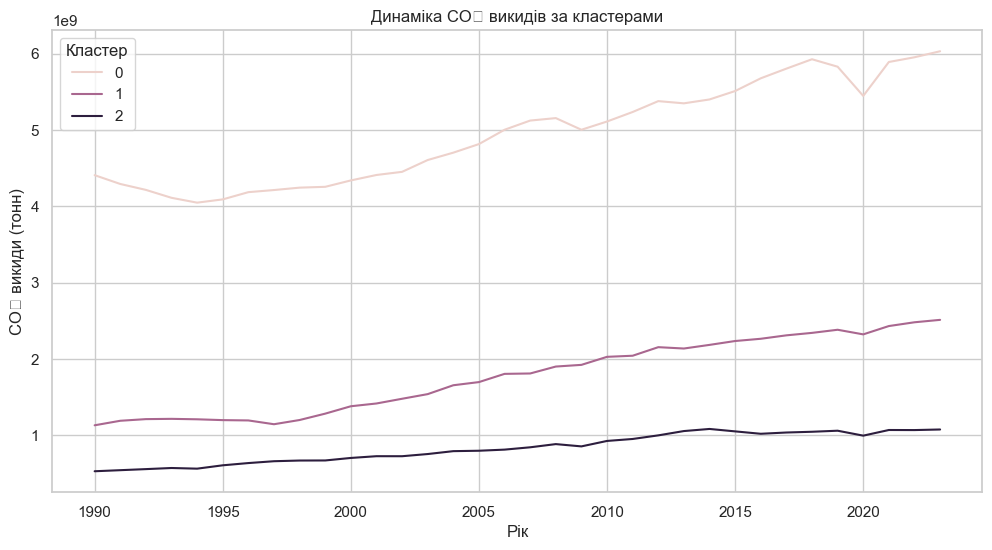

/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


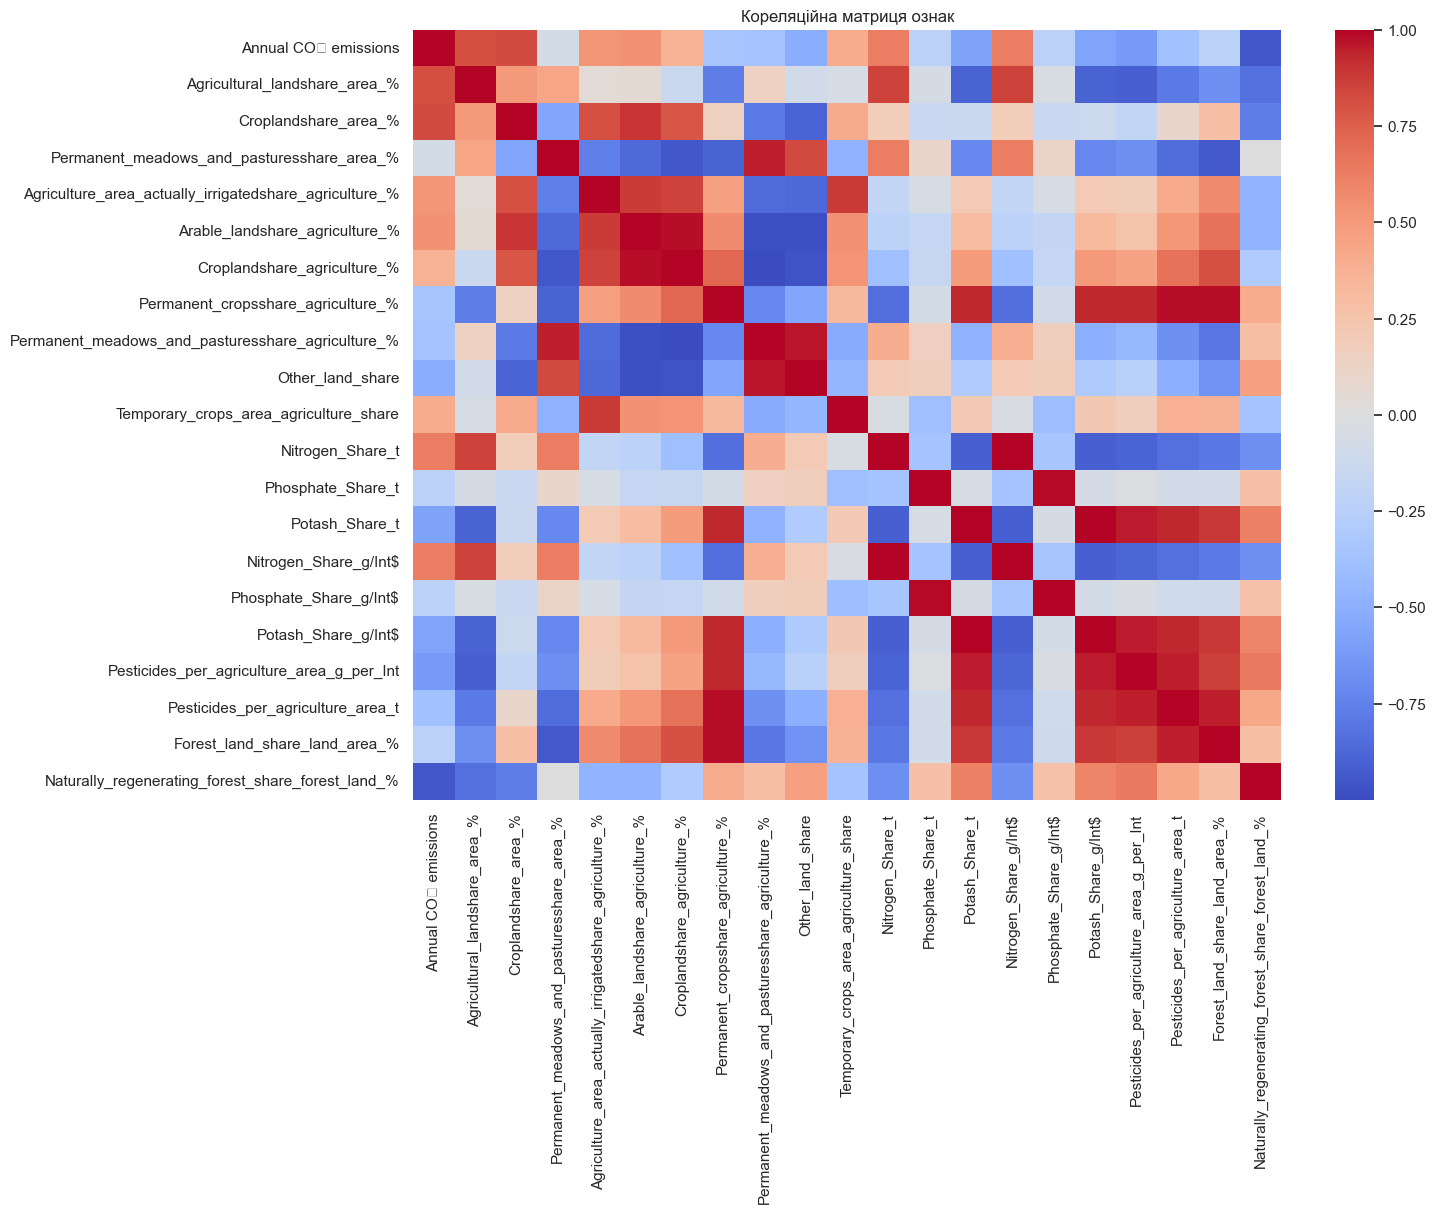

/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


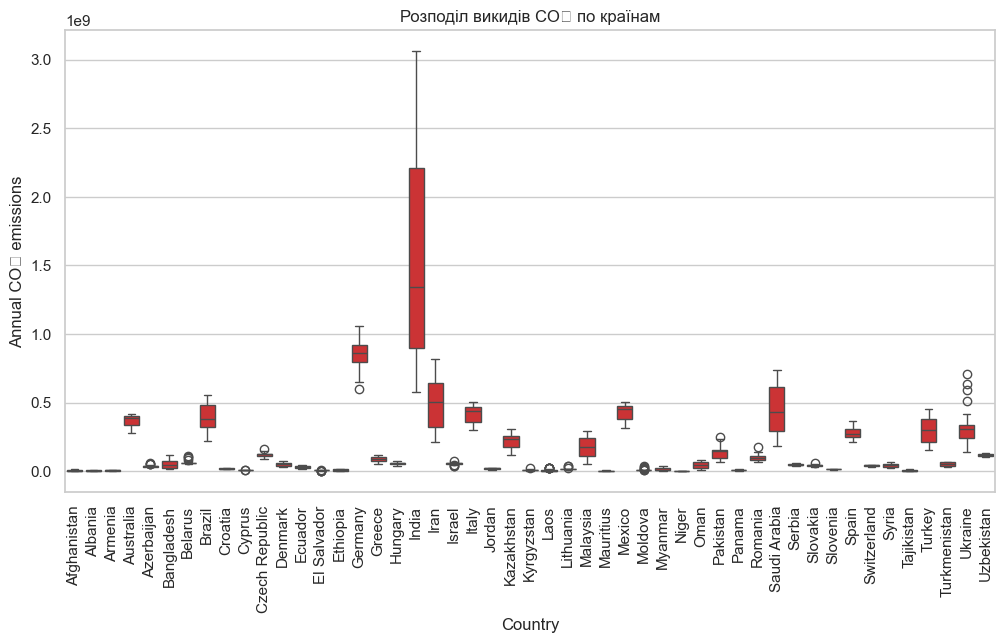

   Cluster  Year  Annual CO₂ emissions  Agricultural_landshare_area_%  \
0        0  1990          4.408702e+09                      60.408750   
1        0  1991          4.293369e+09                      60.098125   
2        0  1992          4.215837e+09                      59.561905   
3        0  1993          4.112051e+09                      58.037391   
4        0  1994          4.048596e+09                      57.899130   

   Croplandshare_area_%  Permanent_meadows_and_pasturesshare_area_%  \
0             39.991875                                   20.416250   
1             39.841875                                   20.256875   
2             40.069524                                   19.491905   
3             39.837826                                   18.200435   
4             39.454783                                   18.443043   

   Agriculture_area_actually_irrigatedshare_agriculture_%  \
0                                                NaN        
1           

In [10]:
# Графік сумарних викидів CO2 по кластерам у часі
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Year', y='Annual CO₂ emissions', hue='Cluster')
plt.title('Динаміка CO₂ викидів за кластерами')
plt.ylabel('CO₂ викиди (тонн)')
plt.xlabel('Рік')
plt.legend(title='Кластер')
plt.show()

# Кореляційна матриця
plt.figure(figsize=(14, 10))
corr_matrix = grouped_df.drop(columns=['Cluster', 'Year']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Кореляційна матриця ознак')
plt.show()

# Розподіл CO2 по країнам (якщо є колонка Country)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Annual CO₂ emissions')
plt.xticks(rotation=90)
plt.title('Розподіл викидів CO₂ по країнам')
plt.show()

# Виведення перших рядків для перевірки
print(grouped_df.head())

## 2. датасет з економічними кластерами 

In [11]:
df = pd.read_csv("dataset_with_economics_clusters.csv")

In [31]:
print(df.head())
print(df.info())
print(df.describe())

       Country  Year  Annual CO₂ emissions  \
0  Afghanistan  1990             2024326.1   
1  Afghanistan  1991             1914301.0   
2  Afghanistan  1992             1482054.0   
3  Afghanistan  1993             1486943.0   
4  Afghanistan  1994             1453829.0   

   Exports of goods and services (% of GDP)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Final consumption expenditure (% of GDP)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Foreign direct investment, net inflows (% of GDP)  \
0                                                NaN   
1                                            

In [32]:
print("Пропущені значення:\n", df.isnull().sum())

Пропущені значення:
 Country                                                                   0
Year                                                                      0
Annual CO₂ emissions                                                      7
Exports of goods and services (% of GDP)                                309
Final consumption expenditure (% of GDP)                                371
Foreign direct investment, net inflows (% of GDP)                       190
GDP per capita (current US$)                                             49
Imports of goods and services (% of GDP)                                309
Population density (people per sq. km of land area)                     408
Urban population (% of total population)                                  0
Adjusted savings: carbon dioxide damage (% of GDP)                      373
Adjusted savings: carbon dioxide damage (% of total population)         329
Exports per capita (current US$)                                   

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/3733710890.py:5: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


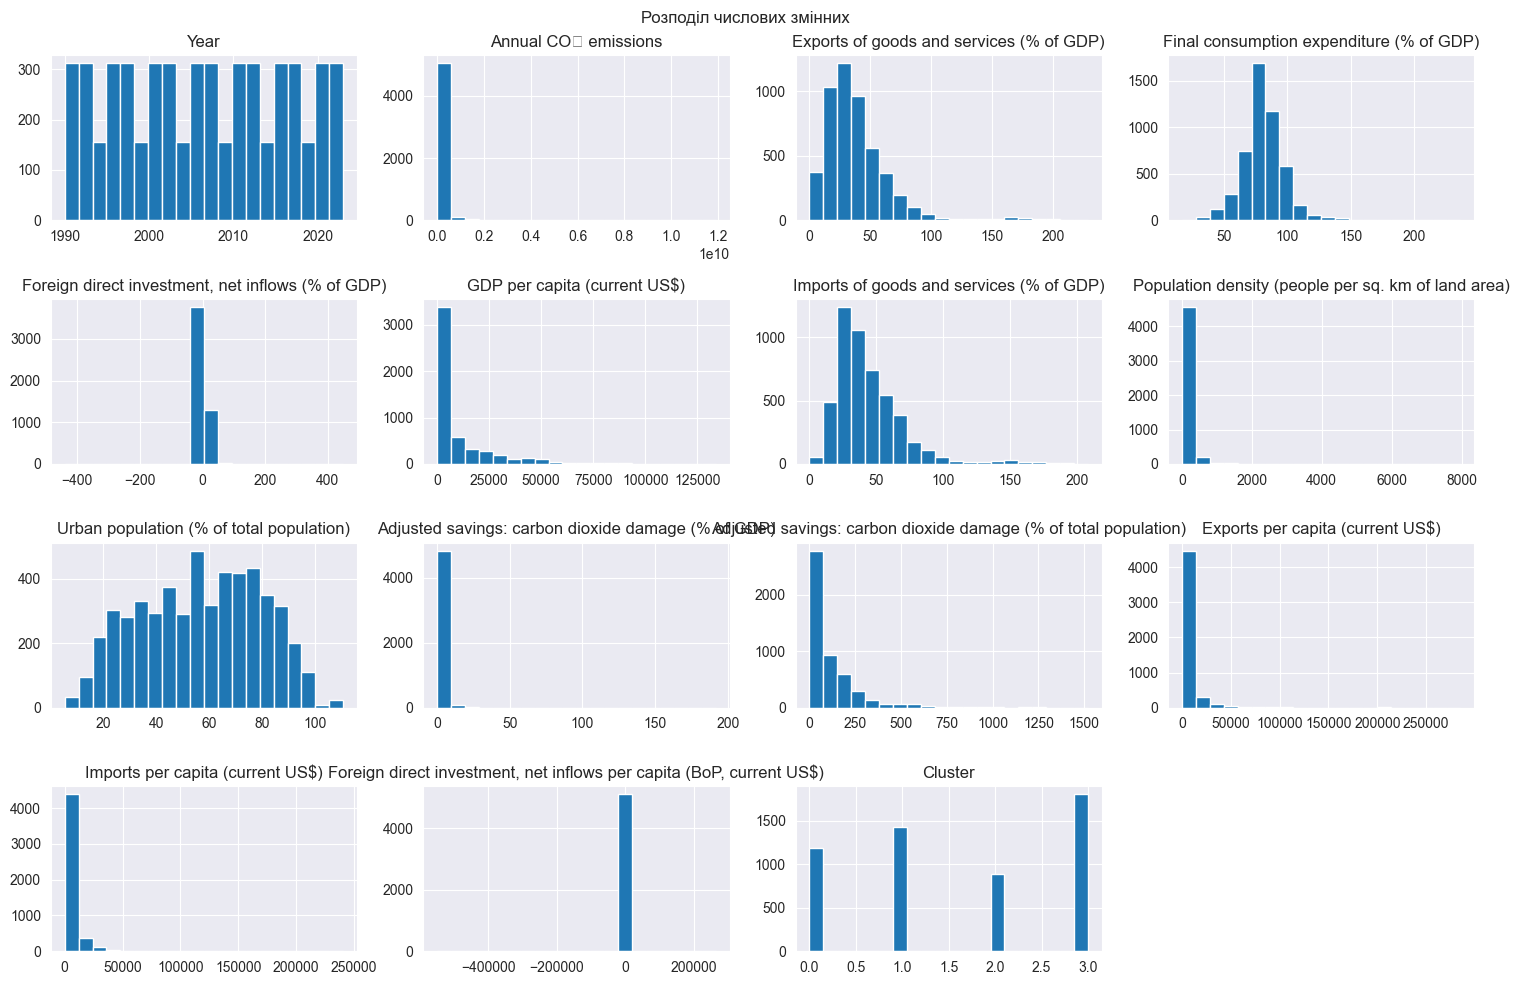

In [33]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Розподіл числових змінних')
plt.tight_layout()
plt.show()

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/671779623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


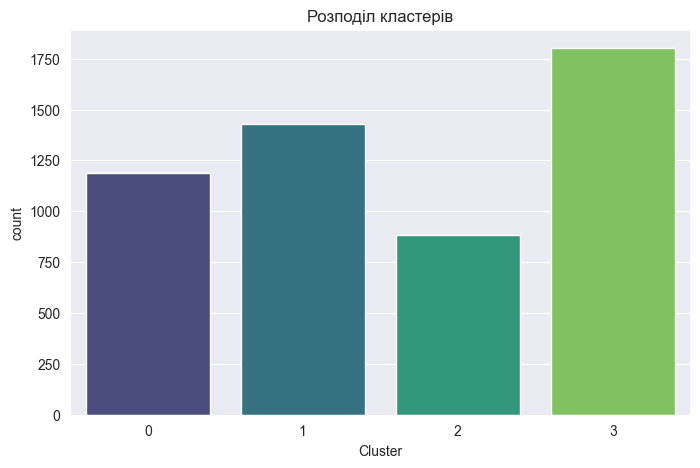

In [34]:
if 'Cluster' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Cluster', data=df, palette='viridis')
    plt.title('Розподіл кластерів')
    plt.show()

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_58202/489457803.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


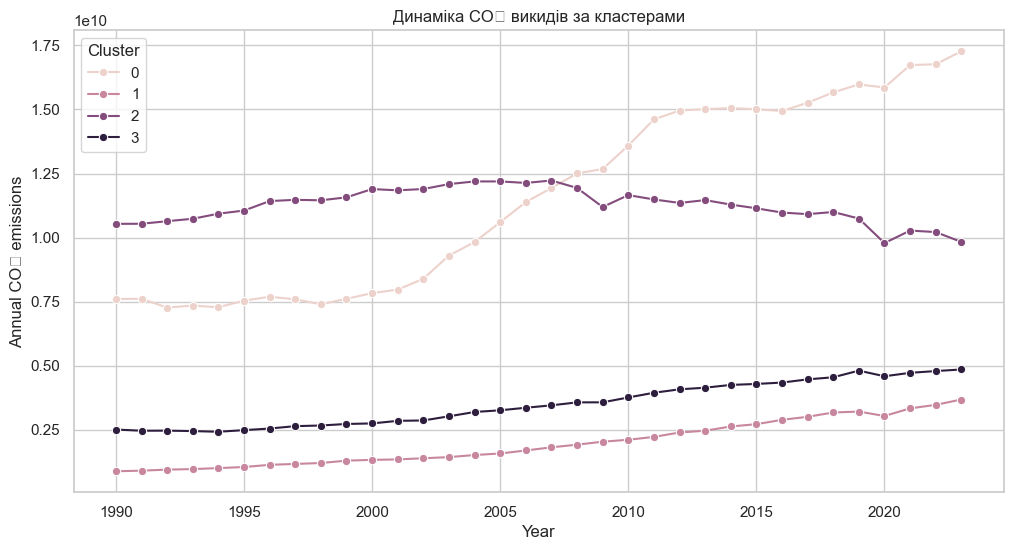

/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


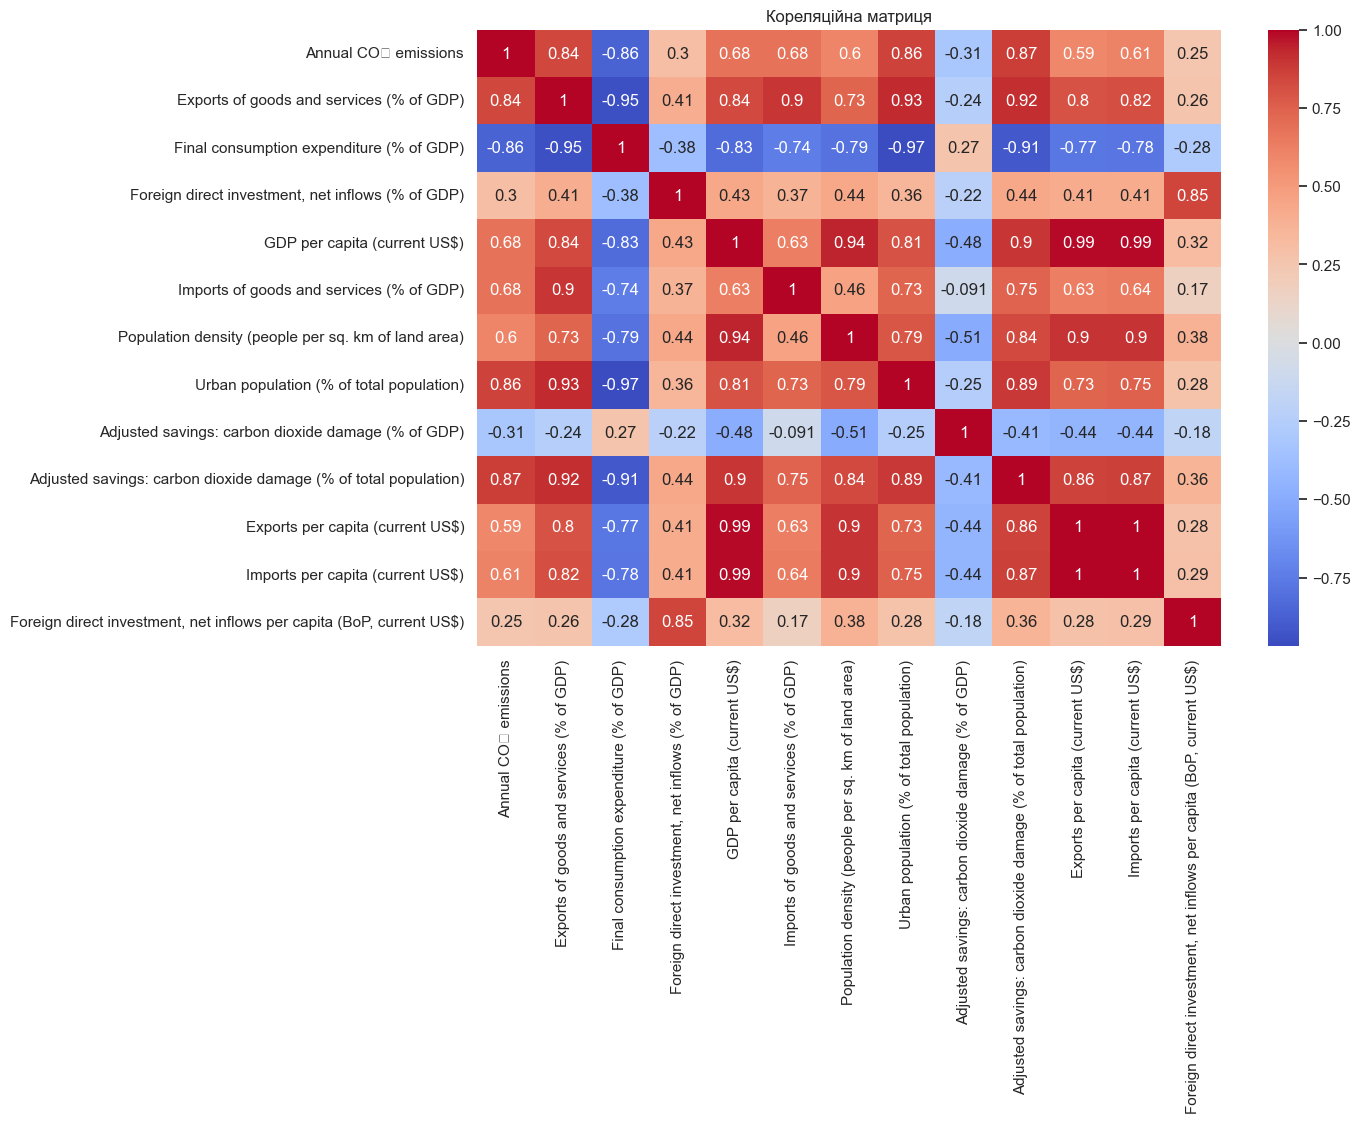

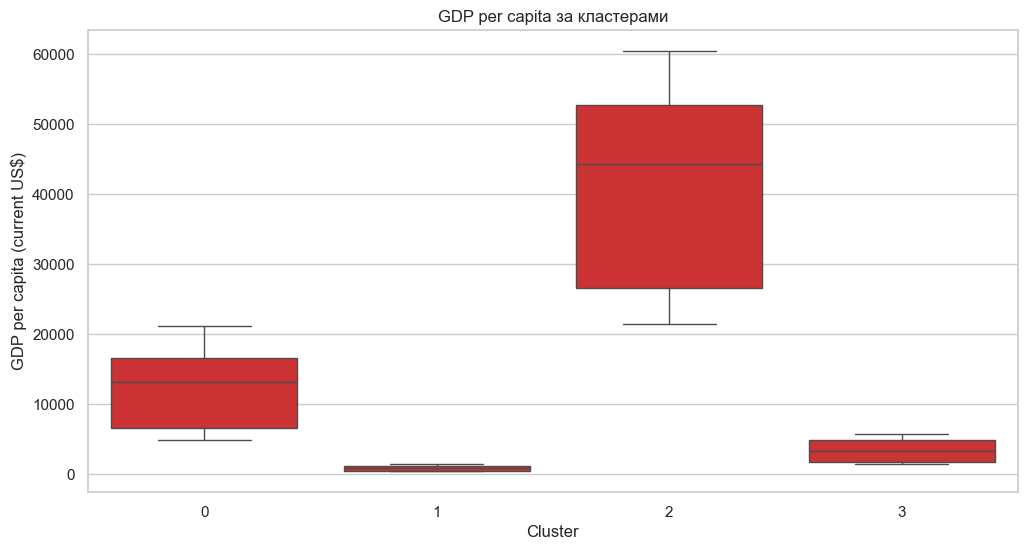

In [12]:
df.interpolate(method='linear', inplace=True)

# Групуємо дані за кластером та роком, усереднюючи всі ознаки, окрім CO2, де буде сума
grouped_df = df.groupby(['Cluster', 'Year']).agg(
    {
        'Annual CO₂ emissions': 'sum',  # Сумуємо викиди CO2
        'Exports of goods and services (% of GDP)': 'mean',
        'Final consumption expenditure (% of GDP)': 'mean',
        'Foreign direct investment, net inflows (% of GDP)': 'mean',
        'GDP per capita (current US$)': 'mean',
        'Imports of goods and services (% of GDP)': 'mean',
        'Population density (people per sq. km of land area)': 'mean',
        'Urban population (% of total population)': 'mean',
        'Adjusted savings: carbon dioxide damage (% of GDP)': 'mean',
        'Adjusted savings: carbon dioxide damage (% of total population)': 'mean',
        'Exports per capita (current US$)': 'mean',
        'Imports per capita (current US$)': 'mean',
        'Foreign direct investment, net inflows per capita (BoP, current US$)': 'mean'
    }).reset_index()

# Візуалізація динаміки CO₂ для кожного кластеру
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Year', y='Annual CO₂ emissions', hue='Cluster', marker='o')
plt.title('Динаміка CO₂ викидів за кластерами')
plt.ylabel('Annual CO₂ emissions')
plt.xlabel('Year')
plt.legend(title='Cluster')
plt.show()

# Кореляційна матриця
plt.figure(figsize=(12, 8))
corr_matrix = grouped_df.drop(columns=['Cluster', 'Year']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

# Boxplot для GDP per capita
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_df, x='Cluster', y='GDP per capita (current US$)')
plt.title('GDP per capita за кластерами')
plt.show()

## 3. датасет з енергетичними кластерами

In [13]:
df = pd.read_csv("dataset_with_energy_clusters.csv")

In [37]:
print(df.head())
print(df.info())
print(df.describe())

   Country  Year  Annual CO₂ emissions  Fossil Share Consumption  \
0  Algeria  1990            76737624.0                  0.998733   
1  Algeria  1991            78806830.0                  0.997224   
2  Algeria  1992            79883310.0                  0.998162   
3  Algeria  1993            81943970.0                  0.996497   
4  Algeria  1994            88608390.0                  0.998374   

   Non-CO₂ Share Consumption  Nuclear Share Consumption  \
0                   0.001267                        0.0   
1                   0.002776                        0.0   
2                   0.001838                        0.0   
3                   0.003503                        0.0   
4                   0.001626                        0.0   

   Renewable Share Consumption  Fossil Electricity Share  \
0                     0.001267                       0.0   
1                     0.002776                       0.0   
2                     0.001838                       0.0

In [38]:
print("Пропущені значення:\n", df.isnull().sum())

Пропущені значення:
 Country                        0
Year                           0
Annual CO₂ emissions           0
Fossil Share Consumption       0
Non-CO₂ Share Consumption      0
Nuclear Share Consumption      0
Renewable Share Consumption    0
Fossil Electricity Share       0
Non-CO₂ Electricity Share      0
Nuclear Electricity Share      0
Renewable Electricity Share    0
Coal Production Share          0
Gas Production Share           0
Oil Production Share           0
Cluster                        0
dtype: int64


/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/3733710890.py:5: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


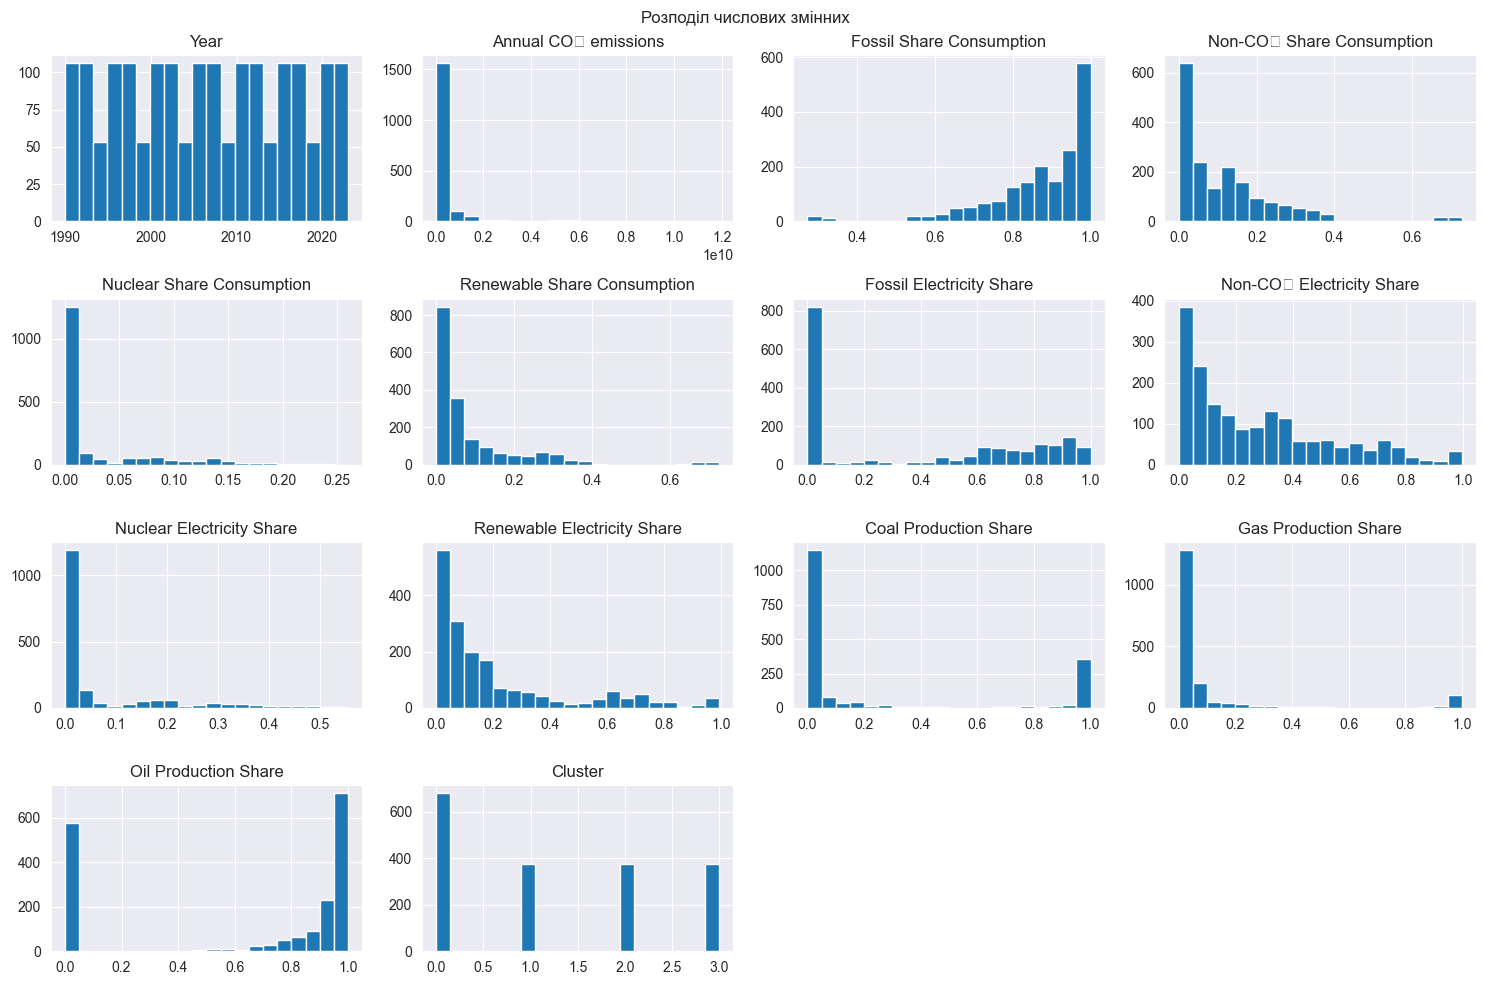

In [39]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Розподіл числових змінних')
plt.tight_layout()
plt.show()

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_15417/671779623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


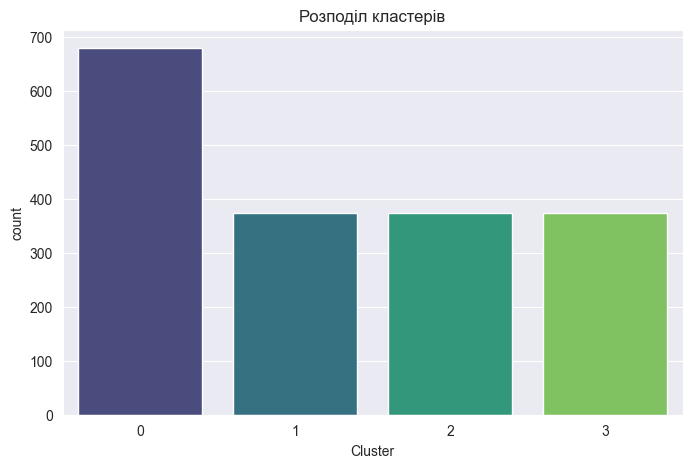

In [40]:
if 'Cluster' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Cluster', data=df, palette='viridis')
    plt.title('Розподіл кластерів')
    plt.show()

/var/folders/zf/fhkcdy917698j4zz6f5tg97c0000gn/T/ipykernel_58202/3873906963.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


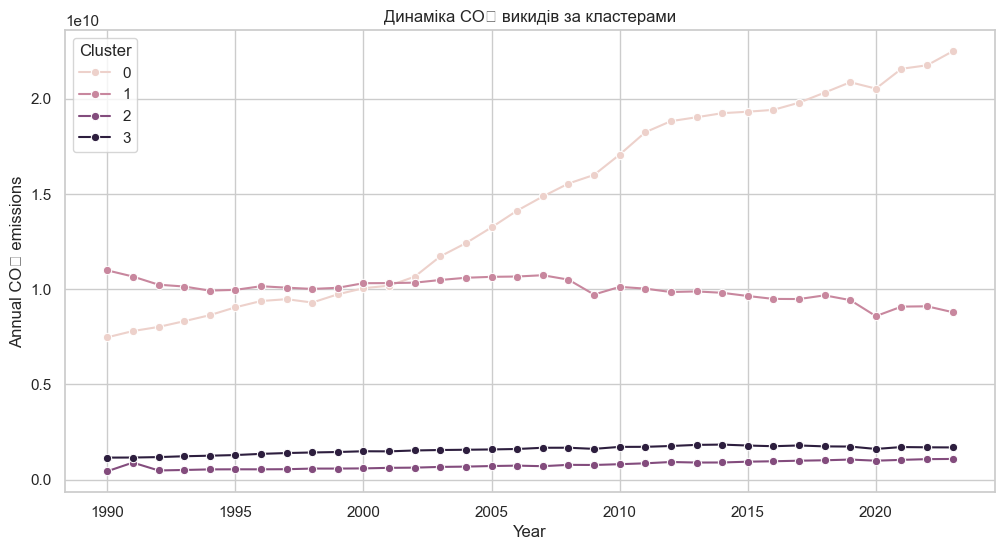

/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
/Users/daria/PycharmProjects/project co2/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


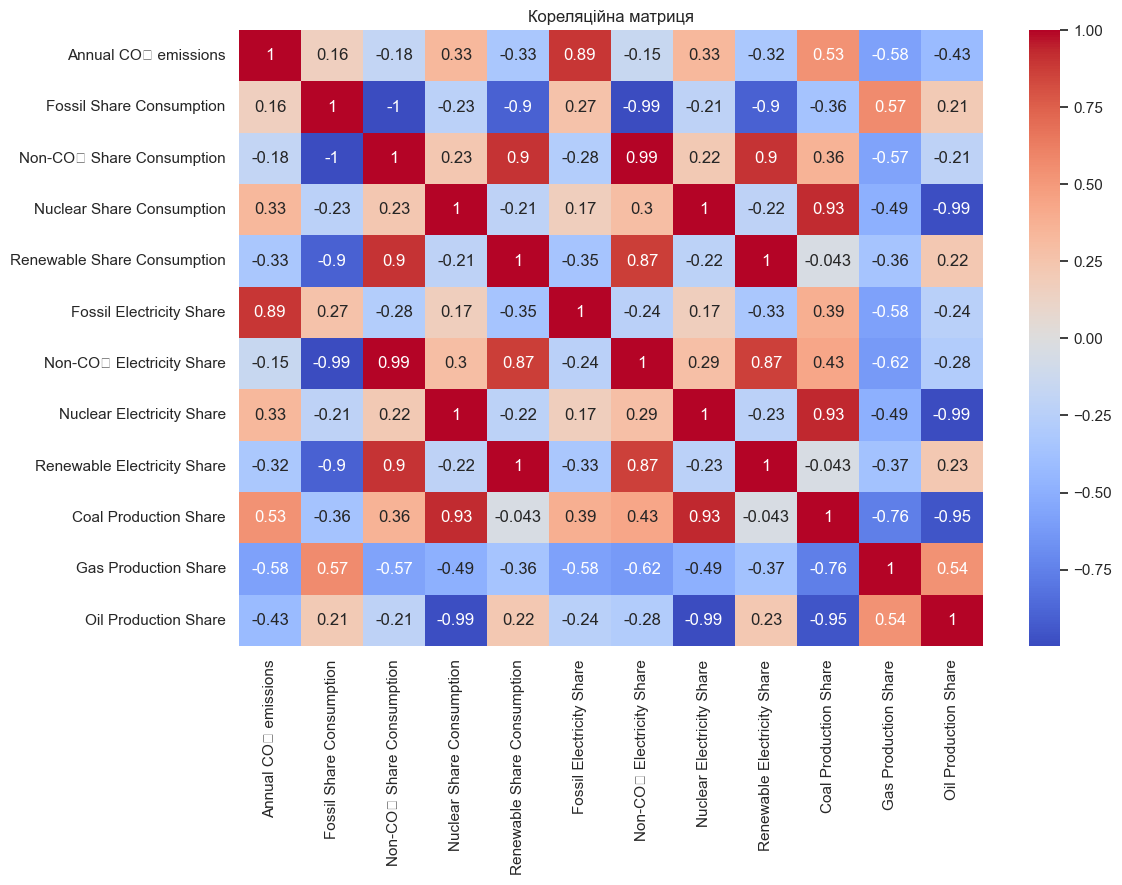

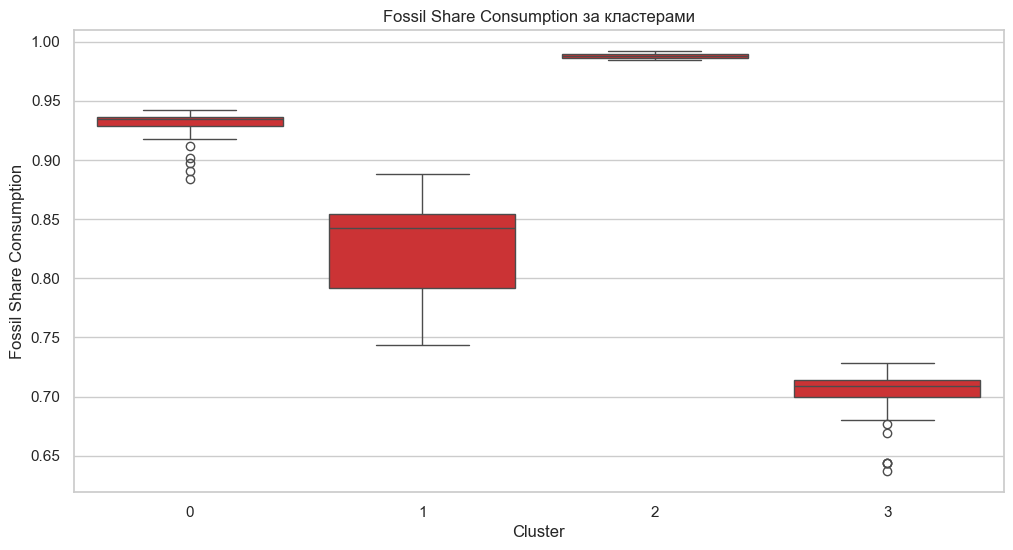

In [14]:
df.interpolate(method='linear', inplace=True)

# Групуємо дані за кластером та роком, усереднюючи всі ознаки, окрім CO₂, де буде сума
grouped_df = df.groupby(['Cluster', 'Year']).agg(
    {
        'Annual CO₂ emissions': 'sum',  # Сумуємо викиди CO₂
        'Fossil Share Consumption': 'mean',
        'Non-CO₂ Share Consumption': 'mean',
        'Nuclear Share Consumption': 'mean',
        'Renewable Share Consumption': 'mean',
        'Fossil Electricity Share': 'mean',
        'Non-CO₂ Electricity Share': 'mean',
        'Nuclear Electricity Share': 'mean',
        'Renewable Electricity Share': 'mean',
        'Coal Production Share': 'mean',
        'Gas Production Share': 'mean',
        'Oil Production Share': 'mean'
    }).reset_index()

# Візуалізація динаміки CO₂ для кожного кластеру
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Year', y='Annual CO₂ emissions', hue='Cluster', marker='o')
plt.title('Динаміка CO₂ викидів за кластерами')
plt.ylabel('Annual CO₂ emissions')
plt.xlabel('Year')
plt.legend(title='Cluster')
plt.show()

# Кореляційна матриця
plt.figure(figsize=(12, 8))
corr_matrix = grouped_df.drop(columns=['Cluster', 'Year']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

# Boxplot для Fossil Share Consumption за кластерами
plt.figure(figsize=(12, 6))
sns.boxplot(data=grouped_df, x='Cluster', y='Fossil Share Consumption')
plt.title('Fossil Share Consumption за кластерами')
plt.show()